In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np


from datetime import datetime
import random as random

In [2]:
data = pd.read_csv("./data.csv")
data["Release date"] = pd.to_datetime(data["Release date"])

In [3]:
date = data["Release date"]
value = data["Number of constraints"]
labels = data["Version"]

In [4]:
# annotator function that draws a label and an arrow 
# that points from the label to its corresponding point
def annotate(ax, label, x, y, xytext):
    ax.annotate(label, xy=(x,y), 
                xytext=xytext, textcoords='offset points', 
                fontsize=15, 
                arrowprops={'arrowstyle': '-|>', 'color': 'black'})

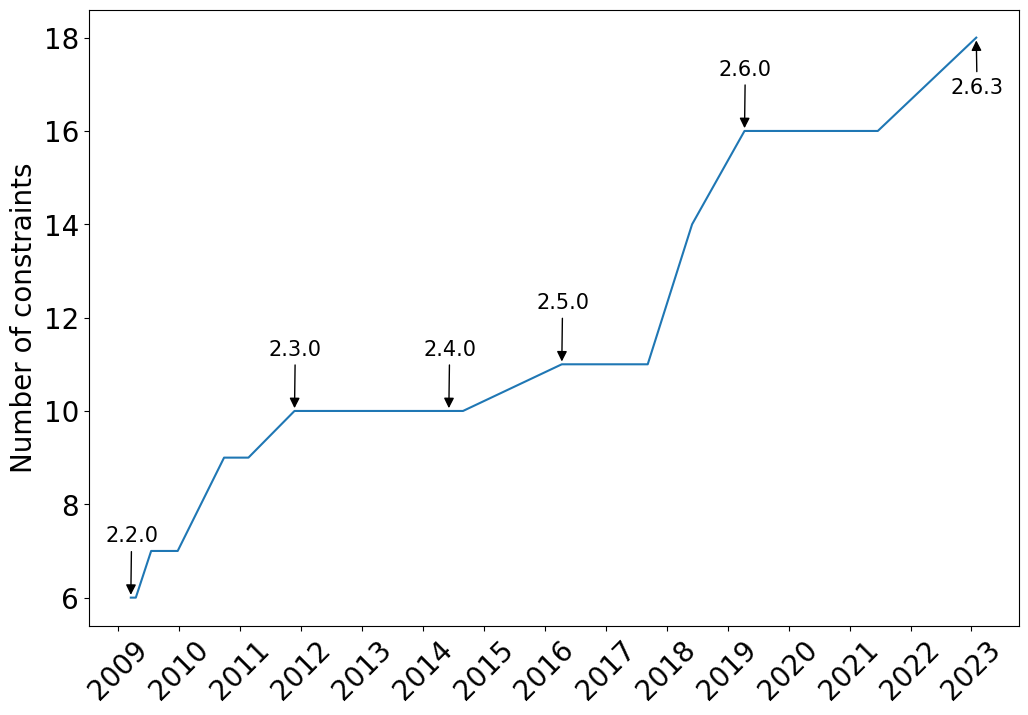

In [7]:
matplotlib.rc('font', size=20)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(date, value)
myFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks([datetime(y,1,1) for y in range(2009,2024)], rotation=45)
for label, x, y in zip(labels, date, value):
    if label[-2:] == ".0":
        annotate(ax, label, x, y, (-18.5, 40))
    elif label == "2.6.3":
        annotate(ax, label, x, y, (-18.5, -40))
plt.ylabel(data.keys()[0])
plt.show()

In [8]:
fig.savefig("../agda-constraints.pdf", dpi=100, format="pdf", bbox_inches="tight")